# Coastal Waste monitoring

### 1- Load my libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import os
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter

### 2- Load my data

In [5]:
file = 'monitoring_items_mb.csv'
filename = os.path.join('./', file)

In [6]:
#Open the file
infile = open(filename, 'r') # 'r' says we are opening the file to read, infile is the opened file object that we will read from

In [7]:
#Store the data from the file in a variable
data = infile.read()


In [8]:
import pandas as pd
df = pd.read_csv(filename, sep = ';')
# Print the Data
df.head()

,ID,MonitoringID,Lat,Lon,Datetime,Quantity,WasteCategory,WasteCode,User
0,1189,Monitoraggio Alberoni WWF,45.348295,12.329182,10/04/2022 13:20,2,PLASTICS,G87,David Poletto
1,1186,Monitoraggio Alberoni WWF,45.348295,12.329182,10/04/2022 13:20,7,PLASTICS,G79,David Poletto
2,1188,Monitoraggio Alberoni WWF,45.348295,12.329182,10/04/2022 13:19,13,PLASTICS,G4,David Poletto
3,1187,Monitoraggio Alberoni WWF,45.348295,12.329182,10/04/2022 13:18,1,PLASTICS,G73,David Poletto
4,1185,Monitoraggio Alberoni WWF,45.348295,12.329182,10/04/2022 13:18,1,PLASTICS,G82,David Poletto


### 3- Descriptive statistics  

In [9]:
#Summary statistics by waste category
df.groupby("WasteCategory")['Quantity'].describe().reset_index()

,WasteCategory,count,mean,std,min,25%,50%,75%,max
0,GLASS/CERAMIC,9.0,2.000000,1.322876,1.0,1.0,1.0,3.00,4.0
1,METAL,4.0,1.500000,1.000000,1.0,1.0,1.0,1.50,3.0
2,PLASTICS,138.0,6.137681,10.686093,1.0,1.0,2.0,7.00,77.0
3,PROCESSED/WORKED WOOD,2.0,3.000000,2.828427,1.0,2.0,3.0,4.00,5.0
4,RUBBER,6.0,1.166667,0.408248,1.0,1.0,1.0,1.00,2.0
5,TEXTILE,4.0,1.250000,0.500000,1.0,1.0,1.0,1.25,2.0


### 4- Plot data 

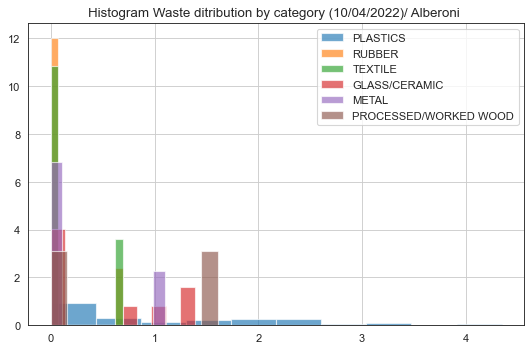

In [13]:
#let's compare the distribution of waste quantity for the 6 waste category

#transform quantity into log
df['log_vals'] = np.log(df['Quantity'])

plt.figure(figsize=(8,5), dpi= 80)

for g in pd.unique(df['WasteCategory']):
    df.loc[df['WasteCategory']==g,'log_vals'].hist(bins=10, alpha=0.65, label=g, density=True)
    #groupby('WasteCategory')['log_vals'].hist(bins=10, alpha=0.65, density=True)
    plt.gca().set(title='Histogram Waste ditribution by category (10/04/2022)/ Alberoni ')
    plt.legend(loc='upper right')
    plt.savefig('Waste_ditribution.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001163F3C53C8>,
      dtype=object)

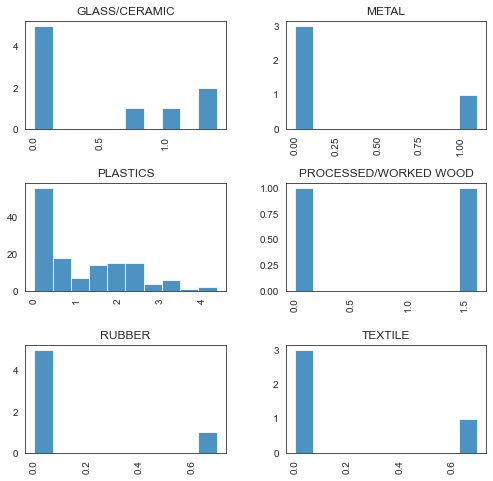

In [14]:
#plot multiple plots of the different wate categories
df['log_vals'].hist(bins=10, by=df['WasteCategory'], 
                     alpha=0.8, figsize=(8,8))

In [41]:
#compute sum per category
sum_byCategory= df.groupby(['WasteCategory']).sum('Quantity');

#create new dataframe
# Create the pandas DataFrame with column name is provided explicitly
df_new = pd.DataFrame(sum_byCategory, columns=[ 'Quantity'])


In [70]:
Quantity = df_new['Quantity']
Quantity

WasteCategory
GLASS/CERAMIC             18
METAL                      6
PLASTICS                 847
PROCESSED/WORKED WOOD      6
RUBBER                     7
TEXTILE                    5
Name: Quantity, dtype: int64

No handles with labels found to put in legend.


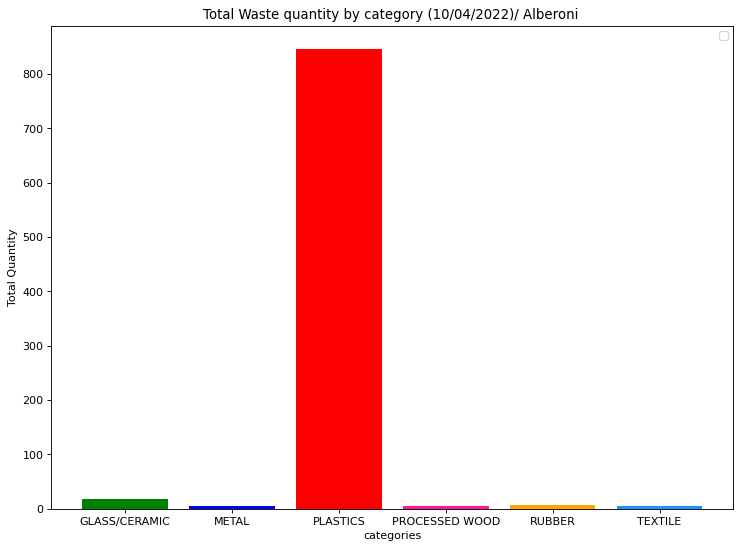

In [74]:

 plt.figure(figsize=(11,8), dpi= 80)

# create dataset
Quantity = df_new['Quantity']
bars =['GLASS/CERAMIC', 'METAL','PLASTICS', 'PROCESSED WOOD','RUBBER', 'TEXTILE']

x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, Quantity, color = ['g','b','r', 'deeppink','orange','dodgerblue'])

# Add title and axis names
plt.title('My title')
plt.xlabel('categories')
plt.ylabel('Total Quantity')
# Create names on the x axis
plt.xticks(x_pos, bars)
plt.gca().set(title='Total Waste quantity by category (10/04/2022)/ Alberoni ')
plt.legend(loc='upper right')
plt.savefig('total_Waste_ditribution.png')
# Show graph
plt.show()